# Data Bootcamp Team Project 

## Power Price and Weather Conditions in Germany: Correlation and Predictions 

### Prepared by: 
#### Elina Movsesyan, Andreas Ramon Canel, Giuseppe Miceli 

The challenges of energy efficiency, consumption and storage, as well as price fluctuations are among the most important issues for the modern society. One of the answers to these challenges are the Smart Grids that are used in many countries. Smart Grids are intelligent data grids that contain excessive amount of data about the environment and factors that affect the energy demand. Smart Grids are trying to understand the relationship between energy demand and other variables, as well as climate variables, in order to better forecast the energy demand and adapt the demand and supply. Obviously, one of the factors of energy demand is the energy price. 

According to many studies, there is strong correlation between the weather conditions and next day power price in countries that are big on renewable energy. In some cases the price can even become negative since there are limitations on energy storage. The purpose of this project is to define the relationship between weather conditions and power price in Germany, the world leader in renewable energy. Besides defining the correlation, we will try to identify what type of weather conditions affect energy price the most and which sources of renewables are playing the important role in this correlation.  

To analyze the correlation between weather conditions and energy production/energy price, as well as to visualize the change of some energy indicators throughout 2017, we are using such data as Actual Energy Generation by Source (DataFrame = type2017), Energy Load (DataFrame = load2017), Change in Energy Capacity by Source (DataFrame = capa2017), Energy Prices (DataFrame = price2017), ...

In [58]:
# import packages 
import pandas as pd                   # data management
import matplotlib as mpl
import matplotlib.pyplot as plt       # graphics 
import datetime as dt                 # check today's date 
import sys                            # check Python version
import numpy as np

# IPython command, puts plots in notebook 
%matplotlib inline

print('Today is', dt.date.today())
print('Python version:\n', sys.version, sep='')
print('Time: ',dt.datetime.now().time())

Today is 2017-12-20
Python version:
3.6.2 |Anaconda, Inc.| (default, Sep 19 2017, 08:03:39) [MSC v.1900 64 bit (AMD64)]
Time:  12:07:38.812028


In [46]:
#to change directory if required

#import os
#os.getcwd()
#os.chdir(r"D:\1 MBA\Exchange\Classes\Data Mining\Kaggle")
#os.getcwd()

In [2]:
#load csv's

#load actual load
load2017 = pd.read_csv('C:\\Users\\eniko\\Desktop\\Elina\\NYU Stern\\Data Bootcamp\\Project\\Total Load - Day Ahead.csv')
load2017 = pd.DataFrame(load2017) #all load is in MW

#load generation per production type
type2017 = pd.read_csv('C:\\Users\\eniko\\Desktop\\Elina\\NYU Stern\\Data Bootcamp\\Project\\Actual Generation per Production Type.csv')
type2017 = pd.DataFrame(type2017)

#load installed capacity
capa2017 = pd.read_csv('C:\\Users\\eniko\\Desktop\\Elina\\NYU Stern\\Data Bootcamp\\Project\\Installed Capacity Per Production Unit.csv')
capa2017 = pd.DataFrame(capa2017)

#load market prices
price2017 = pd.read_csv('C:\\Users\\eniko\\Desktop\\Elina\\NYU Stern\\Data Bootcamp\\Project\\DE-AT-LU_Day-ahead prices.csv')
price2017 = pd.DataFrame(price2017)

print('Actual Load')
print('Shape: ',load2017.shape) 
print(load2017.columns)
print(load2017.dtypes)
print()
print('---------------------------')
print()
print('Production Type')
print('Shape: ',type2017.shape)
print(type2017.columns)
print(type2017.dtypes)
print()
print('---------------------------')
print()
print('Installed Capacity')
print('Shape: ',capa2017.shape)
print(capa2017.columns)
print(capa2017.dtypes)
print('---------------------------')
print()
print('Market Price')
print('Shape: ',price2017.shape)
print(price2017.columns)
print(price2017.dtypes)



Actual Load
Shape:  (35044, 3)
Index(['Time (CET)', 'Day-ahead Total Load Forecast [MW] - BZN|DE-AT-LU',
       'Actual Total Load [MW] - BZN|DE-AT-LU'],
      dtype='object')
Time (CET)                                           object
Day-ahead Total Load Forecast [MW] - BZN|DE-AT-LU    object
Actual Total Load [MW] - BZN|DE-AT-LU                object
dtype: object

---------------------------

Production Type
Shape:  (35044, 23)
Index(['Area', 'MTU', 'Biomass  - Actual Aggregated [MW]',
       'Fossil Brown coal/Lignite  - Actual Aggregated [MW]',
       'Fossil Coal-derived gas  - Actual Aggregated [MW]',
       'Fossil Gas  - Actual Aggregated [MW]',
       'Fossil Hard coal  - Actual Aggregated [MW]',
       'Fossil Oil  - Actual Aggregated [MW]',
       'Fossil Oil shale  - Actual Aggregated [MW]',
       'Fossil Peat  - Actual Aggregated [MW]',
       'Geothermal  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  -

C:\Users\eniko\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (2,3,4,5,6,7,10,11,12,13,14,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Preparation of 'Load' DataFrame

The load2017 DataFrame represents data regarding the actual electrical load ('actual') for every 15 mins of the year 2017 and the prediction for the same 15 mins of the nest day ('day-ahead').  

In [3]:
#rename columns
load2017.columns = ['time', 'day-ahead', 'actual'] 

#print head of load
load2017.head()

,time,day-ahead,actual
0,01.01.2017 00:00 - 01.01.2017 00:15,47220,51824
1,01.01.2017 00:15 - 01.01.2017 00:30,46684,51737
2,01.01.2017 00:30 - 01.01.2017 00:45,45836,51527
3,01.01.2017 00:45 - 01.01.2017 01:00,45428,51106
4,01.01.2017 01:00 - 01.01.2017 01:15,44765,50529


In [4]:
#check how many values are missing

load2017.isnull().sum() 

time           0
day-ahead    805
actual        25
dtype: int64

In [5]:
#clean the data from NaN values

load2017 = load2017.dropna() 

In [6]:
#clean the data from irrelevant values

load2017['actual'] = load2017['actual'][load2017['actual']!='-'] 

In [7]:
load2017.isnull().sum()

time            0
day-ahead       0
actual       1691
dtype: int64

In [8]:
load2017 = load2017.dropna()

In [9]:
load2017['actual'].isnull().sum()

0

In [10]:
load2017['actual'] = load2017['actual'].astype(int)

In [11]:
load2017['date'] = load2017['time'].str.slice(0,10)
load2017['date'] = pd.to_datetime(load2017['date'])
load2017['date'].head()

0   2017-01-01
1   2017-01-01
2   2017-01-01
3   2017-01-01
4   2017-01-01
Name: date, dtype: datetime64[ns]

In [12]:
load2017['hour'] = load2017['time'].str.slice(11,16)
load2017['hour'] = pd.to_datetime(load2017['hour'], format = '%H:%M').dt.time
load2017['hour'].head()

0    00:00:00
1    00:15:00
2    00:30:00
3    00:45:00
4    01:00:00
Name: hour, dtype: object

In [13]:
load2017['timestamp'] = load2017.apply(lambda r : pd.datetime.combine(r['date'],r['hour']),1)
load2017['timestamp'].head()

0   2017-01-01 00:00:00
1   2017-01-01 00:15:00
2   2017-01-01 00:30:00
3   2017-01-01 00:45:00
4   2017-01-01 01:00:00
Name: timestamp, dtype: datetime64[ns]

In [14]:
load2017inh= load2017[load2017.index % 4 == 0]
load2017inh.head()

,time,day-ahead,actual,date,hour,timestamp
0,01.01.2017 00:00 - 01.01.2017 00:15,47220,51824,2017-01-01,00:00:00,2017-01-01 00:00:00
4,01.01.2017 01:00 - 01.01.2017 01:15,44765,50529,2017-01-01,01:00:00,2017-01-01 01:00:00
8,01.01.2017 02:00 - 01.01.2017 02:15,43400,49303,2017-01-01,02:00:00,2017-01-01 02:00:00
12,01.01.2017 03:00 - 01.01.2017 03:15,42713,47190,2017-01-01,03:00:00,2017-01-01 03:00:00
16,01.01.2017 04:00 - 01.01.2017 04:15,42946,46403,2017-01-01,04:00:00,2017-01-01 04:00:00


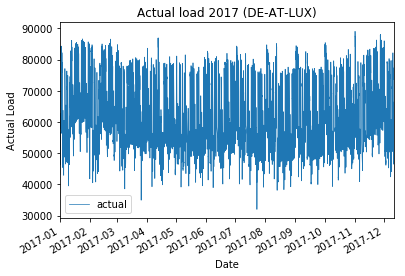

In [15]:
#plot the change of Electrical Load 2017 throughour the year

fig, ax = plt.subplots() 
load2017.plot(ax=ax, title="Actual load 2017 (DE-AT-LUX)", x='timestamp', y='actual', lw=0.7)
ax.set_ylabel("Actual Load")
ax.set_xlabel("Date")

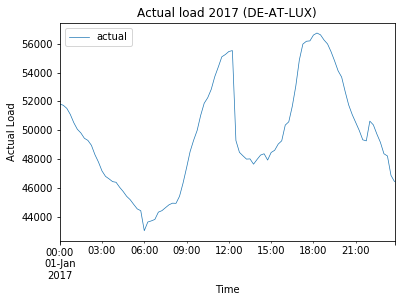

In [16]:
fig, ax = plt.subplots() 
load2017.iloc[:96].plot(ax=ax, title="Actual load 2017 (DE-AT-LUX)", x='timestamp', y='actual', lw=0.7)
ax.set_ylabel("Actual Load")
ax.set_xlabel("Time")

#problem: graph looks starnge when you plot more than 96 ticks

# Preparation of 'Energy Type Generation' DataFrame

The type2017 DataFrame reflects the data about energy generated every 15 mins of the year 2017 presented by each energy source. Since we are interested in energy sources affected by the weather conditions, from this data we will mainly be focused on Solar and Wind energy. 

In [17]:
#print head of type

type2017.head()

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],...,Hydro Run-of-river and poundage - Actual Aggregated [MW],Hydro Water Reservoir - Actual Aggregated [MW],Marine - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
0,BZN|DE-AT-LU,01.01.2017 00:00 - 01.01.2017 00:15 (CET),5024,13270,605,3628,4598,196,n/e,n/e,...,2592,532,n/e,6456,3840,100,0,433,3300,12140
1,BZN|DE-AT-LU,01.01.2017 00:15 - 01.01.2017 00:30 (CET),5015,13344,596,3398,4621,195,n/e,n/e,...,2624,633,n/e,6463,3829,100,0,433,3304,12211
2,BZN|DE-AT-LU,01.01.2017 00:30 - 01.01.2017 00:45 (CET),5013,13285,595,3241,4755,196,n/e,n/e,...,2630,657,n/e,6457,3778,100,0,432,3303,12313
3,BZN|DE-AT-LU,01.01.2017 00:45 - 01.01.2017 01:00 (CET),5012,13293,587,3077,4807,195,n/e,n/e,...,2640,649,n/e,6454,3572,100,0,433,3306,12181
4,BZN|DE-AT-LU,01.01.2017 01:00 - 01.01.2017 01:15 (CET),5011,13694,588,2798,5007,196,n/e,n/e,...,2657,601,n/e,6464,3989,100,0,433,3308,12156


In [18]:
#check how many values are missing from the data

type2017.isnull().sum() 

Area                                                         0
MTU                                                          0
Biomass  - Actual Aggregated [MW]                            5
Fossil Brown coal/Lignite  - Actual Aggregated [MW]          4
Fossil Coal-derived gas  - Actual Aggregated [MW]            4
Fossil Gas  - Actual Aggregated [MW]                         7
Fossil Hard coal  - Actual Aggregated [MW]                   6
Fossil Oil  - Actual Aggregated [MW]                         6
Fossil Oil shale  - Actual Aggregated [MW]                   4
Fossil Peat  - Actual Aggregated [MW]                        4
Geothermal  - Actual Aggregated [MW]                         4
Hydro Pumped Storage  - Actual Aggregated [MW]               6
Hydro Pumped Storage  - Actual Consumption [MW]              6
Hydro Run-of-river and poundage  - Actual Aggregated [MW]    6
Hydro Water Reservoir  - Actual Aggregated [MW]              4
Marine  - Actual Aggregated [MW]                       

In [19]:
#clean the data

type2017 = type2017.dropna() 

In [20]:
type2017.isnull().sum()

Area                                                         0
MTU                                                          0
Biomass  - Actual Aggregated [MW]                            0
Fossil Brown coal/Lignite  - Actual Aggregated [MW]          0
Fossil Coal-derived gas  - Actual Aggregated [MW]            0
Fossil Gas  - Actual Aggregated [MW]                         0
Fossil Hard coal  - Actual Aggregated [MW]                   0
Fossil Oil  - Actual Aggregated [MW]                         0
Fossil Oil shale  - Actual Aggregated [MW]                   0
Fossil Peat  - Actual Aggregated [MW]                        0
Geothermal  - Actual Aggregated [MW]                         0
Hydro Pumped Storage  - Actual Aggregated [MW]               0
Hydro Pumped Storage  - Actual Consumption [MW]              0
Hydro Run-of-river and poundage  - Actual Aggregated [MW]    0
Hydro Water Reservoir  - Actual Aggregated [MW]              0
Marine  - Actual Aggregated [MW]                       

In [65]:
type2017_2 = type2017[type2017.index % 4 == 0] # we'll address to this later

In [66]:
#separate Sun and Wind Energy as main focus

typesub2017 = type2017_2[['MTU','Solar  - Actual Aggregated [MW]', 'Wind Offshore  - Actual Aggregated [MW]', 'Wind Onshore  - Actual Aggregated [MW]']]

In [67]:
#rename the columns

typesub2017 = typesub2017.rename(index=str, columns={"Solar  - Actual Aggregated [MW]": "Solar", "Wind Offshore  - Actual Aggregated [MW]": "Wind Offshore", "Wind Onshore  - Actual Aggregated [MW]" : "Wind Onshore" })
typesub2017.head()

,MTU,Solar,Wind Offshore,Wind Onshore
0,01.01.2017 00:00 - 01.01.2017 00:15 (CET),0,3300,12140
4,01.01.2017 01:00 - 01.01.2017 01:15 (CET),0,3308,12156
8,01.01.2017 02:00 - 01.01.2017 02:15 (CET),0,3300,12070
12,01.01.2017 03:00 - 01.01.2017 03:15 (CET),0,3298,11539
16,01.01.2017 04:00 - 01.01.2017 04:15 (CET),0,3302,11622


In [68]:
typesub2017.isnull().sum()

MTU              0
Solar            0
Wind Offshore    0
Wind Onshore     0
dtype: int64

In [69]:
#remove irrelevant values and clean the data from missing values

typesub2017['Solar'] = typesub2017['Solar'][typesub2017['Solar']!='-']
typesub2017['Wind Onshore'] = typesub2017['Wind Onshore'][typesub2017['Wind Onshore']!='-']
typesub2017['Wind Offshore'] = typesub2017['Wind Offshore'][typesub2017['Wind Offshore']!='-']
typesub2017['Solar'] = typesub2017['Solar'].dropna()

In [70]:
typesub2017 = typesub2017.dropna()

In [71]:
typesub2017.isnull().sum()

MTU              0
Solar            0
Wind Offshore    0
Wind Onshore     0
dtype: int64

In [72]:
#change the type of columns to integer

typesub2017['Solar'] = typesub2017['Solar'].astype(int)
typesub2017['Wind Offshore'] = typesub2017['Wind Offshore'].astype(int)
typesub2017['Wind Onshore'] = typesub2017['Wind Onshore'].astype(int)

In [73]:
typesub2017.dtypes

MTU              object
Solar             int32
Wind Offshore     int32
Wind Onshore      int32
dtype: object

In [74]:
#check that not all the values are 0

typesub2017['Solar'].sum() 

36748103

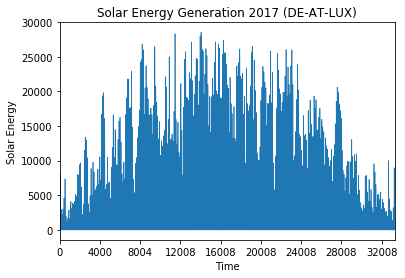

In [75]:
#plot the change of Solar Energy throughout the year 2017

fig, ax = plt.subplots() 
typesub2017['Solar'].plot(ax=ax, title="Solar Energy Generation 2017 (DE-AT-LUX)", lw=0.7)
ax.set_ylabel("Solar Energy")
ax.set_xlabel("Time")

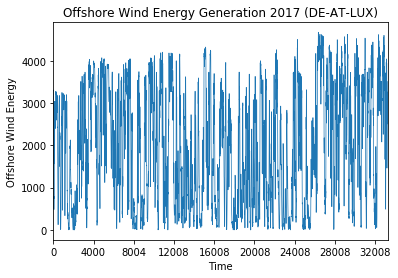

In [76]:
#plot the change of Offshore Wind Energy throughout the year 2017

fig, ax = plt.subplots() 
typesub2017['Wind Offshore'].plot(ax=ax, title="Offshore Wind Energy Generation 2017 (DE-AT-LUX)", lw=0.7)
ax.set_ylabel("Offshore Wind Energy")
ax.set_xlabel("Time")

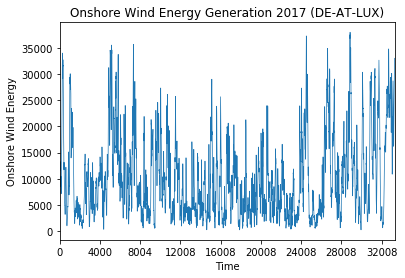

In [77]:
#plot the change of Onshore Wind Energy throughout the year 2017

fig, ax = plt.subplots() 
typesub2017['Wind Onshore'].plot(ax=ax, title="Onshore Wind Energy Generation 2017 (DE-AT-LUX)", lw=0.7)
ax.set_ylabel("Onshore Wind Energy")
ax.set_xlabel("Time")

# Preparation of 'Capacity' DataFrame

The capa2017 DataFrame reflects data on Electrical Capacity by Energy Source - both currently available and added capacity throughout the year 2017. 

In [33]:
#print head of capa
capa2017.head()

,Area / Date,Production Type,Code,Name,Intalled Capacity at the beginning of year [MW],Current Installed Capacity [MW],Location,Voltage Connection Level [V],Commissioning Date,Decommissioning Date
0,BZN|DE-AT-LU / 01.01.2017 00:00 - 01.01.2018 0...,Fossil Brown coal/Lignite,11WD7NEUR-B-KW-B,Neurath,4212.0,4212.0,intra_zonal,380,26.10.2009,NaN
1,BZN|DE-AT-LU / 01.01.2017 00:00 - 01.01.2018 0...,Fossil Brown coal/Lignite,11WD7NIED-B-KW-5,Niederaußem,3398.0,3398.0,intra_zonal,380,26.10.2009,NaN
2,BZN|DE-AT-LU / 01.01.2017 00:00 - 01.01.2018 0...,Fossil Brown coal/Lignite,11WD8JAEN1L----Z,KW Jänschwalde,2998.0,2998.0,intra_zonal,380,26.10.2009,NaN
3,BZN|DE-AT-LU / 01.01.2017 00:00 - 01.01.2018 0...,Nuclear,11WD7KRBG1K-KW-V,Gundremmingen,2572.0,2572.0,intra_zonal,380,26.10.2009,NaN
4,BZN|DE-AT-LU / 01.01.2017 00:00 - 01.01.2018 0...,Fossil Brown coal/Lignite,11WD8BOXB1L----J,KW Boxberg,2470.0,2470.0,intra_zonal,380,26.10.2009,NaN


In [34]:
capa2017['Production Type'].unique()

array(['Fossil Brown coal/Lignite', 'Nuclear', 'Fossil Gas',
       'Hydro Pumped Storage', 'Fossil Hard coal', 'Fossil Oil',
       'Fossil Coal-derived gas', 'Hydro Water Reservoir', 'Wind Offshore',
       'Hydro Run-of-river and poundage', 'Waste', 'Wind Onshore'], dtype=object)

In [35]:
#exctact the change in capacity for Onshore and Offshore Wind Energy

capa2017offshore = capa2017[capa2017['Production Type'] == 'Wind Offshore']
capa2017onshore = capa2017[capa2017['Production Type'] == 'Wind Onshore']

In [36]:
capa2017offshore.head()

,Area / Date,Production Type,Code,Name,Intalled Capacity at the beginning of year [MW],Current Installed Capacity [MW],Location,Voltage Connection Level [V],Commissioning Date,Decommissioning Date
71,BZN|DE-AT-LU / 01.01.2017 00:00 - 01.01.2018 0...,Wind Offshore,11WD2OWVM000355S,Offshore-Windpark Veja Mate,402.0,402.0,Nordsee,155,01.01.2017,NaN
74,BZN|DE-AT-LU / 01.01.2017 00:00 - 01.01.2018 0...,Wind Offshore,11WD2OGTI000264J,Global Tech I,400.0,400.0,Nordsee AWZ,380,31.12.2014,NaN
75,BZN|DE-AT-LU / 01.01.2017 00:00 - 01.01.2018 0...,Wind Offshore,11WD2OBA1000349Z,Bard Offshore 1,NaN,400.0,intra_zonal,155,10.04.2017,NaN
87,BZN|DE-AT-LU / 01.01.2017 00:00 - 01.01.2018 0...,Wind Offshore,11WD8BALT3W---PS,Windpark Baltic 1 and 2,336.0,336.0,intra_zonal,380,04.08.2015,NaN
89,BZN|DE-AT-LU / 01.01.2017 00:00 - 01.01.2018 0...,Wind Offshore,11W0-0000-0029-P,Windpark Nordsee One,NaN,332.0,intra_zonal,155,13.06.2017,NaN


In [37]:
capa2017onshore.head()

,Area / Date,Production Type,Code,Name,Intalled Capacity at the beginning of year [MW],Current Installed Capacity [MW],Location,Voltage Connection Level [V],Commissioning Date,Decommissioning Date
147,BZN|DE-AT-LU / 01.01.2017 00:00 - 01.01.2018 0...,Wind Onshore,11WD8HAVLXW---PM,Windpark Havelland,147.0,147.0,intra_zonal,380,10.12.2015,NaN


In [38]:
print('Installed Offshore Capacity:',capa2017offshore['Current Installed Capacity [MW]'].sum(),'MW')
print('Installed Onshore Capacity:',capa2017onshore['Current Installed Capacity [MW]'].sum(),'MW')
print('Total:', capa2017offshore['Current Installed Capacity [MW]'].sum()+capa2017onshore['Current Installed Capacity [MW]'].sum())

Installed Offshore Capacity: 4530.0 MW
Installed Onshore Capacity: 147.0 MW
Total: 4677.0


# Preparation of 'Price' DataFrame

The price2017 DataFrame represents the electricity price for each hour throughout the year 2017 for specific European countries, including Germany. 

In [39]:
price2017.head()

,Date,Time,Germany/Austria/Luxembourg[Euro/MWh],Denmark 1[Euro/MWh],Denmark 2[Euro/MWh],France[Euro/MWh],Northern Italy[Euro/MWh],Netherlands[Euro/MWh],Poland[Euro/MWh],Sweden 4[Euro/MWh],Switzerland[Euro/MWh],Slovenia[Euro/MWh],Czech Republic[Euro/MWh],Hungary[Euro/MWh]
0,1/1/17,12:00 AM,20.96,20.96,20.96,58.82,53,42,24.03,24.03,57.04,53.00,18.5,57.25
1,1/1/17,1:00 AM,20.90,20.9,20.9,58.23,52,49.94,24.03,24.03,51.94,52.00,13.0,50.21
2,1/1/17,2:00 AM,18.13,18.13,18.13,51.95,51,51.95,24.02,24.02,49.07,51.00,16.0,44.04
3,1/1/17,3:00 AM,16.03,16.03,16.03,47.27,47.27,40.99,23.04,23.19,45.01,47.27,16.4,32.81
4,1/1/17,4:00 AM,16.43,16.43,16.43,45.49,45.49,39,18.87,24.1,42.4,45.49,16.0,28.41


In [41]:
# slice price DataFrame to show only Germany

price2017 = price2017[['Date', 'Time', 'Germany/Austria/Luxembourg[Euro/MWh]']]
price2017.columns = ['Date', 'Time', 'DE-AT-LUX']
price2017.head()

,Date,Time,DE-AT-LUX
0,1/1/17,12:00 AM,20.96
1,1/1/17,1:00 AM,20.90
2,1/1/17,2:00 AM,18.13
3,1/1/17,3:00 AM,16.03
4,1/1/17,4:00 AM,16.43


In [42]:
price2017.dtypes

Date          object
Time          object
DE-AT-LUX    float64
dtype: object

In the chart below we see the hourly electricity price change in Germany. Most of the time the range of price change is relatively stable, however at some points there is a very abrupt jump in price or the opposite, a negative price. 

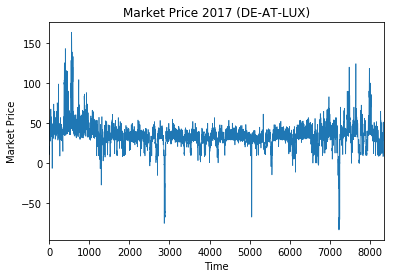

In [43]:
#plot the horuly energy price for 2017

fig, ax = plt.subplots() 
price2017['DE-AT-LUX'].plot(ax=ax, title="Market Price 2017 (DE-AT-LUX)", lw=0.7)
ax.set_ylabel("Market Price")
ax.set_xlabel("Time")

# Combining the necessary data from the available Data Sets

Now that we have all the necessary data to observe collerations between energy production and prices, we need to combine the DataFrame with energy prices and the DataFrame with energy generation by merging them based on the dates (day, time 2017). The reason we merge these two DataFrames in order to show the correlatin between price and weather is because:

1. It would be a very complicated task to aggregate historical data about weather that is available by regions of the country.
2. The correlation between wind and generation of wind power is obvious and hardly needs proof. Consequently, we can assume that correlation between energy price and wind energy generation will show correlation between energy price and wind (same with Solar energy).

To merge the DataFrames, first we need to identify the common date unit and adjust the loaded DataFrames accordingly. The common DateTime format for both DataFrames would be a column that contains the day and hour (since our price data contains hourly prices and energy generation data contains generation volume for each 15 mins). 

In [44]:
# Create the 'DateTime' column in the price2017 DataFrame

price2017['DateTime'] = pd.to_datetime(price2017['Date'] + ' ' + price2017['Time'])

C:\Users\eniko\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
# Remove the 'Date' and 'Time' columns

price2017 = price2017.drop(['Date','Time'], axis=1)

In [85]:
price2017 = price2017.rename(columns={'DE-AT-LUX':'Price_Germany'})

In [86]:
price2017.head()

,Price_Germany,DateTime
0,20.96,2017-01-01 00:00:00
1,20.90,2017-01-01 01:00:00
2,18.13,2017-01-01 02:00:00
3,16.03,2017-01-01 03:00:00
4,16.43,2017-01-01 04:00:00


In [78]:
# Previously, we left only every forth row of the type2017 DataFrame and  created 
# the typesub2017 DataFrame based on that. Now we'll multiply the value by 4
# in order to get the hourly energy generation volume (assuming that within the same hour
# energy generated every 15 mins is relatively stable)

typesub2017['Solar'] = typesub2017['Solar'].multiply(4)
typesub2017['Wind Offshore'] = typesub2017['Wind Offshore'].multiply(4)
typesub2017['Wind Onshore'] = typesub2017['Wind Onshore'].multiply(4)

In [79]:
# Cretae the DateTime column from the TimeDelta column that we have in the energy generation data

typesub2017['MTU2'] = typesub2017.MTU.str[:16]
typesub2017['DateTime'] = pd.to_datetime(typesub2017['MTU2'])

In [80]:
# Removing the MTU and MTU2 columns

typesub2017 = typesub2017.drop(['MTU','MTU2'],axis=1)

In [87]:
typesub2017.head()

,Solar,Wind Offshore,Wind Onshore,DateTime
0,0,13200,48560,2017-01-01 00:00:00
4,0,13232,48624,2017-01-01 01:00:00
8,0,13200,48280,2017-01-01 02:00:00
12,0,13192,46156,2017-01-01 03:00:00
16,0,13208,46488,2017-01-01 04:00:00


In [88]:
# Merge the two DataFrames based on DateTime 
# using inner join with price data as left (since price data is shorter)

merged = price2017.merge(typesub2017,how='inner',left_on='DateTime',right_on='DateTime')

In [89]:
# Set DateTime as index

merged = merged.set_index('DateTime')

In [90]:
merged.head()

,Price_Germany,Solar,Wind Offshore,Wind Onshore
DateTime,,,,
2017-01-01 00:00:00,20.96,0,13200,48560
2017-01-01 01:00:00,20.90,0,13232,48624
2017-01-01 02:00:00,18.13,0,13200,48280
2017-01-01 03:00:00,16.03,0,13192,46156
2017-01-01 04:00:00,16.43,0,13208,46488


In [91]:
merged.corr()

,Price_Germany,Solar,Wind Offshore,Wind Onshore
Price_Germany,1.000000,-0.033750,-0.225997,-0.321930
Solar,-0.033750,1.000000,-0.138782,-0.155728
Wind Offshore,-0.225997,-0.138782,1.000000,0.668174
Wind Onshore,-0.321930,-0.155728,0.668174,1.000000


We see that the energy price has 0.23 and 0.32 negative correlation with Offshore and Onshore Wind respectively. Although correlation is not very high, it's still significant and essentially influences the energy price during windy weather. 

# WORKING UNTIL HERE